In [2]:
import io

import numpy as np
import pandas as pd

pd.set_option('display.precision', 2)

In [6]:
prc = pd.read_csv(
    io.StringIO('ticker,open,date,close\nAAPL,426.23,2018-01-04,435.23\nMSFT,42.3,2018-01-04,51.3\nAAPL,436.23,2018-01-05,\nMSFT,52.3,2018-01-05,\n'),
    parse_dates=['date']
)
prc2 = prc.assign(
    date=pd.to_datetime('2018-01-06'),
    close=prc.open + np.random.randn(len(prc.open))
).drop('open', axis=1)


In [7]:

volume = pd.DataFrame({
    'ticker': ['AAPL', 'MSFT', 'IBM', 'YHOO', 'GOOG'],
    'volume': [1954.73,  335.83,  362.79,  858.18,  629.79]
}).assign(date=pd.to_datetime('2018-01-05'))

In [8]:
prc

,ticker,open,date,close
0,AAPL,426.23,2018-01-04,435.23
1,MSFT,42.30,2018-01-04,51.30
2,AAPL,436.23,2018-01-05,NaN
3,MSFT,52.30,2018-01-05,NaN


In [9]:
volume

,ticker,volume,date
0,AAPL,1954.73,2018-01-05
1,MSFT,335.83,2018-01-05
2,IBM,362.79,2018-01-05
3,YHOO,858.18,2018-01-05
4,GOOG,629.79,2018-01-05


Exercise

Merge prc and volume on ticker, date:

        Preserving only the records with common tickers and dates

        Preserving all the records in prc

        Preserving the records in both prc and volume

All of these merges should be performed on ticker and date

In [12]:
cols = ['ticker', 'date']
pd.merge(prc, volume, on=cols)

,ticker,open,date,close,volume
0,AAPL,436.23,2018-01-05,NaN,1954.73
1,MSFT,52.30,2018-01-05,NaN,335.83


In [13]:
pd.merge(prc, volume, on=cols, how='left')

,ticker,open,date,close,volume
0,AAPL,426.23,2018-01-04,435.23,NaN
1,MSFT,42.30,2018-01-04,51.30,NaN
2,AAPL,436.23,2018-01-05,NaN,1954.73
3,MSFT,52.30,2018-01-05,NaN,335.83


In [14]:
pd.merge(prc, volume, on=cols, how='outer')

,ticker,open,date,close,volume
0,AAPL,426.23,2018-01-04,435.23,NaN
1,AAPL,436.23,2018-01-05,NaN,1954.73
2,GOOG,NaN,2018-01-05,NaN,629.79
3,IBM,NaN,2018-01-05,NaN,362.79
4,MSFT,42.30,2018-01-04,51.30,NaN
5,MSFT,52.30,2018-01-05,NaN,335.83
6,YHOO,NaN,2018-01-05,NaN,858.18


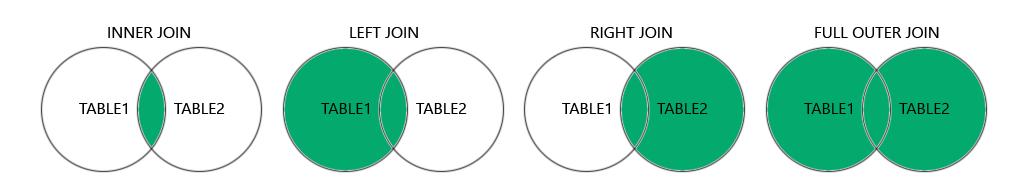